# Final Project Secondus Notebook

In this notebook I take you through my idea and execution of Project Secondus. In this project, I used webscraping techniques to retrieve all of the faces off of the Menlo Knightbook and use the Face++ API to manipulate them in interesting ways. 

# Step 1: Webscraping 

Below is the code I used to webscrape the entire Knightbook (https://knightbook.menloschool.org) for each grade. Scraping required me to first go through the authetication process using my given username and password. I attempted to go through and take each photo off of the Knightbook and name the photo such that it gave me easy access to identify it. 

In [1]:
import requests
import shutil
import re
import json
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from matplotlib.pyplot import figure


from bs4 import BeautifulSoup

Creating the session and going through the authetication process. If you would like to replicate this, you must run it in sublime and use a valid username and password. 

In [2]:
url = "https://knightbook.menloschool.org"

human_headers = { "accept" : "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
                 "accept-language" : "en-US,en;q=0.9",
                 "accept-encoding" : "gzip, deflate, br",
                 "upgrade-insecure-requests" : "1",
                 "user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.183 Safari/537.36 Vivaldi/1.96.1147.64"
                }

# Creating the session
session = requests.Session()
response = session.get(url, headers=human_headers)
response_bs = BeautifulSoup(response.text, "html.parser")

login_page = response_bs.form['action']
login_method = response_bs.form['method']

inputList =  response_bs.findAll('input')
login_inputs = {}
for tag in inputList:
    if 'name' in tag.attrs:
        login_inputs[tag['name']] = tag.get('value','')

# Must input valid username and password in order for it to run:
login_inputs['username'] = 'USERNAME'
login_inputs['password'] = 'PASSWORD'

location = response.history[0].headers['Location']
server = re.match("^(https://\w+\.\w+\.\w{1,3}:?\d*)[/a-zA-Z]*",location).group(1)
#print(server)

kb = session.post(server+login_page, data=login_inputs)
bsObj = BeautifulSoup(kb.text, "html.parser") # The actual object of the page


Now I use the Beautiful Soup object I created to get the URL for the image for each person. I than extract that image and put it into the KnightbookScraping folder, the Grade folder (depending on their grade), and the Male or Female folder (depending on their gender).

In [3]:
full_info = bsObj.findAll("div", {"class":"student-box"})

for info in full_info:
    
    # Each person in the nightbook is given a certain id
    # This id is included in the URL and is what differentiates each URL for each picture
    person_id = str(info.get("data-rid"))
    picture_link = "https://knightbook.menloschool.org/get_photo.php?rid=" + person_id + "&ay=1819&s=s"

    print(picture_link)

    name = str(info.get("data-name"))
    grade = str(info.get("data-grade"))
    gender = str(info.get("data-gender"))

    if int(grade) < 9:
        picture_name = name + "_" + gender + "_Grade-" + grade 
        picture_location = "/Users/anupaarora/Desktop/KnightbookScraping/Grade-" + grade + "/" + gender + "/"

        final_save = picture_location + picture_name + ".png"

        # Learned to save pictures this way by following this link: https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests
        response = session.get(picture_link, stream=True)
        with open(final_save, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        del response


# Step 2: Looking at & Analyzing Knightbook Images

Below I take a look at some of the images that I downloaded from the knightbook and I analyze them. I learned about something called 'glob' (https://pymotw.com/2/glob/) which is often used to manipulate datasets with large amounts of images. I used the glob library to give structure to the naming convetion and easily go through and call/manipulate everything.

In [4]:
# The glob library is similar to regex in that it 'matches' to different things. 
# So I can use similar notation such as * and [A-Z] to get multiple people from the folder

grade_12_image_names = glob.glob("./KnightbookScraping/Grade-12/*[A-Za-z]/*.png")
print(grade_12_image_names[0:1])

['./KnightbookScraping/Grade-12/Female/Abby Kaplan_female_Grade-12.png']


In [5]:
def good_title(title):
    title = str(title).strip("[]")
    title = title.strip("'")
    
    return title

title1 = good_title(grade_12_image_names[0:1])
title2 = good_title(grade_12_image_names[1:2])
title3 = good_title(grade_12_image_names[2:3])
title4 = good_title(grade_12_image_names[3:4])

Using the titles created above to show images in a plot format

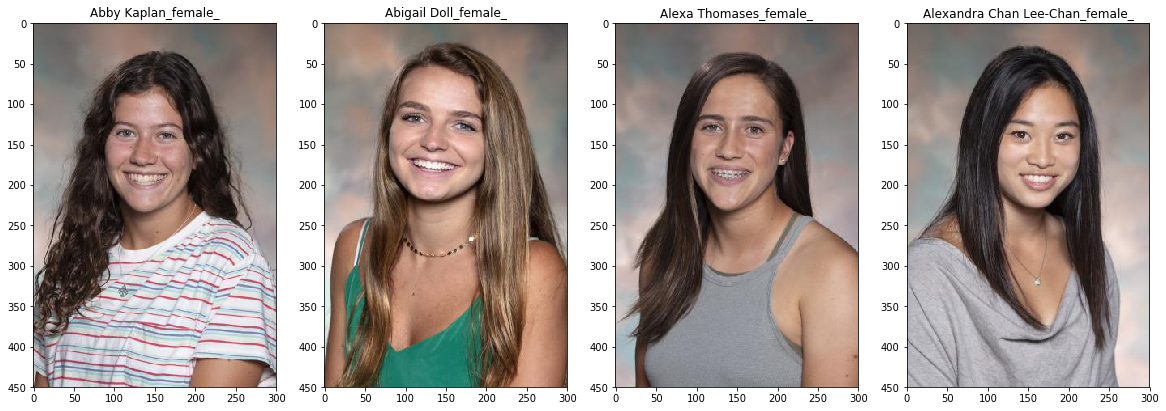

In [6]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title(title1.strip("./KnightbookScraping/Grade-12/Female/"))
img = mpimg.imread(title1, 0)
imgplot = ax1.imshow(img)

ax2.set_title(title2.strip("./KnightbookScraping/Grade-12/Female/"))
img = mpimg.imread(title2, 0)
imgplot2 = ax2.imshow(img)

ax3.set_title(title3.strip("./KnightbookScraping/Grade-12/Female/"))
img = mpimg.imread(title3, 0)
imgplot3 = ax3.imshow(img)

ax4.set_title(title4.strip("./KnightbookScraping/Grade-12/Female/"))
img = mpimg.imread(title4, 0)
imgplot4 = ax4.imshow(img)

plt.show()

Below is the shape of the image that shows the width, length, and the amount of color demensions it contains. 

In [7]:
print(img.shape)

(450, 300, 3)


Doing the same thing with males just to make sure all pictures are the same dimensions/features as females

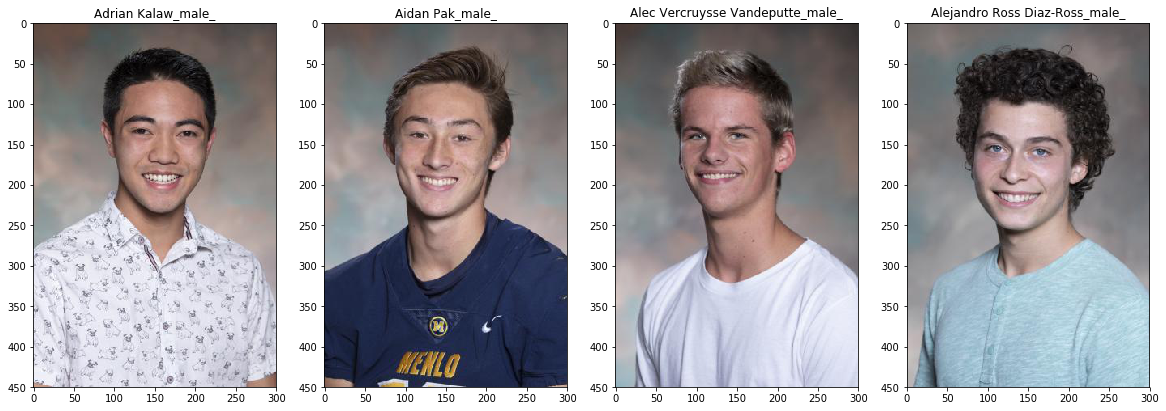

In [8]:
grade_12_image_male_names = glob.glob("./KnightbookScraping/Grade-12/Male/*.png")

title1M = good_title(grade_12_image_male_names[0:1])
title2M = good_title(grade_12_image_male_names[1:2])
title3M = good_title(grade_12_image_male_names[2:3])
title4M = good_title(grade_12_image_male_names[3:4])

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title(title1M.strip("./KnightbookScraping/Grade-12/Male/"))
img = mpimg.imread(title1M, 0)
imgplot = ax1.imshow(img)

ax2.set_title(title2M.strip("./KnightbookScraping/Grade-12/Male/"))
img = mpimg.imread(title2M, 0)
imgplot2 = ax2.imshow(img)

ax3.set_title(title3M.strip("./KnightbookScraping/Grade-12/Male/"))
img = mpimg.imread(title3M, 0)
imgplot3 = ax3.imshow(img)

ax4.set_title(title4M.strip("./KnightbookScraping/Grade-12/Male/"))
img = mpimg.imread(title4M, 0)
imgplot4 = ax4.imshow(img)

plt.show()

In [9]:
print(img.shape)

(450, 300, 3)


Since all images are the same (i.e. they are the same width/length and have the same color dimensions), there is no need for preprocessing/cropping/transformations. 

# Step 3: Having fun with the Photos (Using an API) 

In order to do interesting things with the photos, I found the API Face++. It was exciting since there actually were not many APIs that you could easily use to mess with faces. However, it also proved to be extremely troubling since all of the documentation was in chinese...google translate was heavily used! 

API Documentation: https://console.faceplusplus.com.cn/documents/20813963

## Putting Faces Together! 

The main thing I did with this API was putting features from one face onto another. The way this API combines images is to use a template image, and then add features of the other images to that template image. While most of the template image stays intact, it may perhaps add a couple feature (such as wrinkles of the other person or the make of the other person etc.) 

**Important:**

Below is the code ONLY to CALL on the API. I had use the files within PythonSDK to actually do any manipulations. I have added the following files in this larger directory, and it will work ONLY if you have these files in the directory as well:

- ImagePro.py 
- faceapp.py
- structures.py
- compat.py

In [10]:
from pprint import pformat # System libraries & Helper Functions
from PythonSDK.facepp import API,File # PythonSDK
import PythonSDK.ImagePro # Image Processing Class

In [11]:
# Following code taken from documentation (see call.py): 

# 此方法专用来打印api返回的信息
def print_result(hit, result):
    print(hit)
    print('\n'.join("  " + i for i in pformat(result, width=75).split('\n')))

def printFuctionTitle(title):
    return "\n"+"-"*60+title+"-"*60;

# 初始化对象，进行api的调用工作
api = API()

In [12]:
# Using their example images first to see how it works: 
segment_img = './imgResource/segment.jpg'
merge_img = './imgResource/merge.jpg'

In [13]:
mergeFace_res = api.mergeface(template_file=File(segment_img), merge_file=File(merge_img))
#print_result("mergeFace", mergeFace_res)

In [14]:
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"])

Title：MergeResultImg.jpg，Saved to: .imgResource/


**The original Images:** 

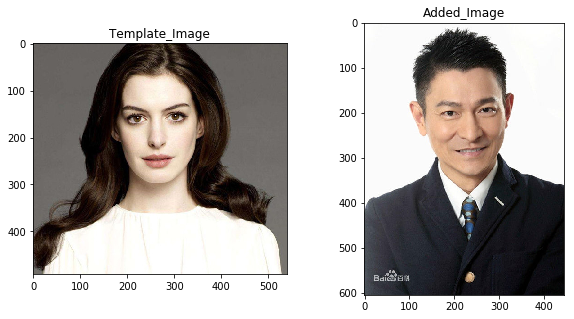

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Template_Image')
img = mpimg.imread(segment_img, 0)
imgplot = ax1.imshow(img)

ax2.set_title('Added_Image')
img = mpimg.imread(merge_img, 0)
imgplot2 = ax2.imshow(img)

plt.show()

**Merged Image**

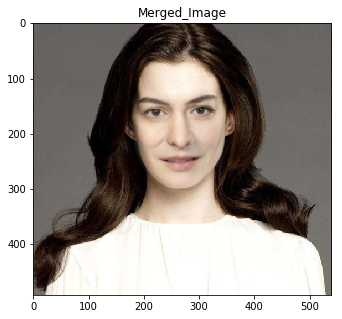

In [16]:
f, (ax1) = plt.subplots(1, 1, figsize=(10,5))

ax1.set_title('Merged_Image')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax1.imshow(img)

plt.show()

See how it more or less kept the same figure but added a couple different features? Some of the features added/changed were:

- Jaw line 
- Eyes changed
- Shading around the cheek 
- Slight change in color 
- Bags around eyes

## Adding Make-Up to Luke Bowsher & Matt Phua!?!?!

One of the interesting use-cases of this API is to add different interesting features of another person to someone else and see how it looks on them. For instance, while scraping I found that many of the girls had makeup on. The second picture in my scraping data for 12th graders is of Abby Doll -- who seems to have a sufficient amount of makeup on to accomplish this. See the results below, after the code!

In [17]:
luke_bowsher = './KnightbookScraping/Grade-12/Male/Luke Bowsher_male_Grade-12.png'
abby_doll = './KnightbookScraping/Grade-12/Female/Abigail Doll_female_Grade-12.png'
matt_phua = './KnightbookScraping/Grade-12/Male/Matthew Phua_male_Grade-12.png'

mergeFace_res = api.mergeface(template_file=File(luke_bowsher), merge_file=File(abby_doll))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

Title：MergeResultImg.jpg，Saved to: .imgResource/


**The original Images:** 

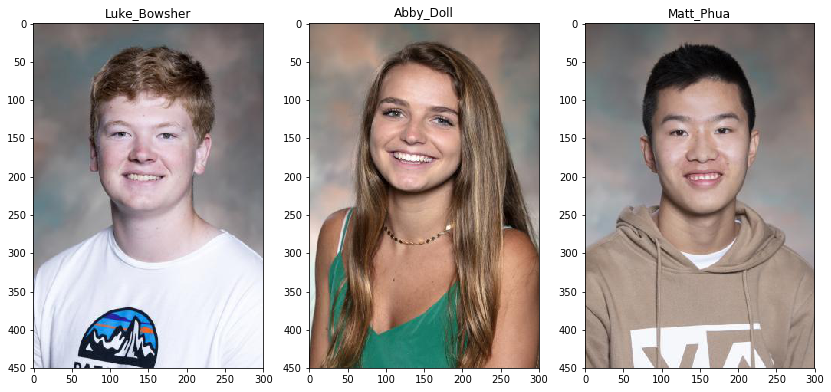

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,8))

ax1.set_title('Luke_Bowsher')
img = mpimg.imread(luke_bowsher, 0)
imgplot = ax1.imshow(img)

ax2.set_title('Abby_Doll')
img = mpimg.imread(abby_doll, 0)
imgplot2 = ax2.imshow(img)

ax3.set_title('Matt_Phua')
img = mpimg.imread(matt_phua, 0)
imgplot3 = ax3.imshow(img)

plt.show()

Title：MergeResultImg.jpg，Saved to: .imgResource/


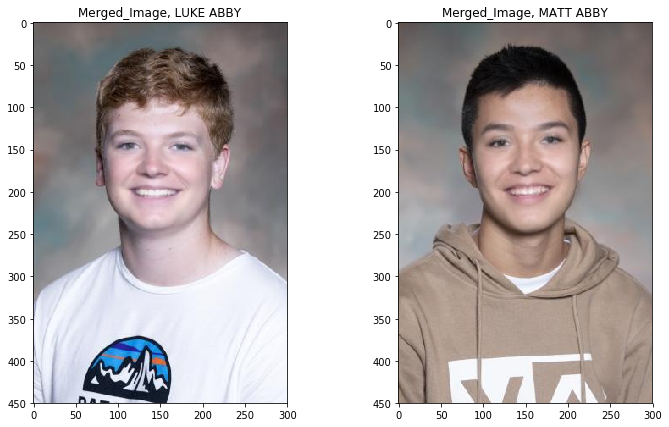

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))

ax1.set_title('Merged_Image, LUKE ABBY')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax1.imshow(img)

mergeFace_res = api.mergeface(template_file=File(matt_phua), merge_file=File(abby_doll))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

ax2.set_title('Merged_Image, MATT ABBY')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax2.imshow(img)

plt.show()

## Luke & Matt OLD!! (BONUS JOSEPH!?!?!?!)

The program doesn't just stop at makeup...let's make Luke and Matt old! I found an image of an old man and added it to the img/resources directory. Lets see what happens when we add his face to Luke and Matt. (I am going to skip over the original images here because I think the idea of how you do it is clear :) 

Title：MergeResultImg.jpg，Saved to: .imgResource/
Title：MergeResultImg.jpg，Saved to: .imgResource/


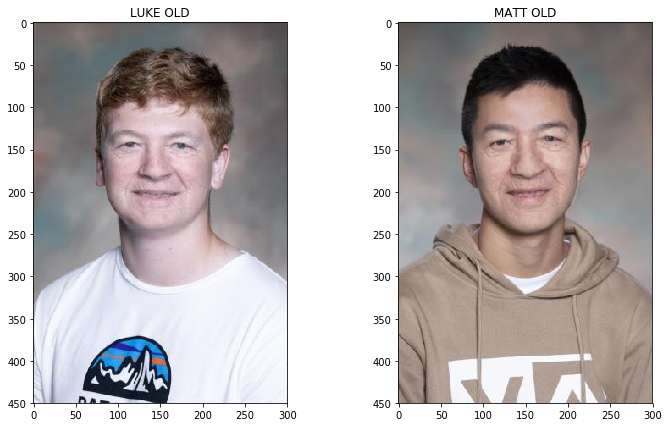

In [26]:
wrinkles = './imgResource/wrinkles.jpg'

mergeFace_res = api.mergeface(template_file=File(luke_bowsher), merge_file=File(wrinkles))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))

ax1.set_title('LUKE OLD')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax1.imshow(img)

mergeFace_res = api.mergeface(template_file=File(matt_phua), merge_file=File(wrinkles))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

ax2.set_title('MATT OLD')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax2.imshow(img)

plt.show()

Title：MergeResultImg.jpg，Saved to: .imgResource/


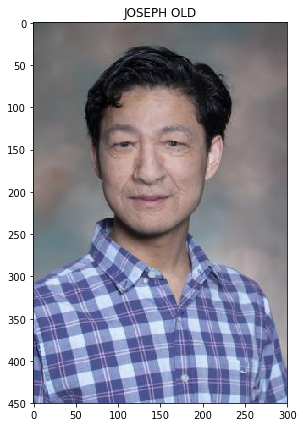

In [38]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,7))

mergeFace_res = api.mergeface(template_file=File(joseph_ma), merge_file=File(wrinkles))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

ax1.set_title('JOSEPH OLD')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax1.imshow(img)

plt.show()

## Luke and Matt as Zombies! 

Let's make them into zombies...exciting times! (Merged them with a zombie face I found on google). 

Title：MergeResultImg.jpg，Saved to: .imgResource/
Title：MergeResultImg.jpg，Saved to: .imgResource/


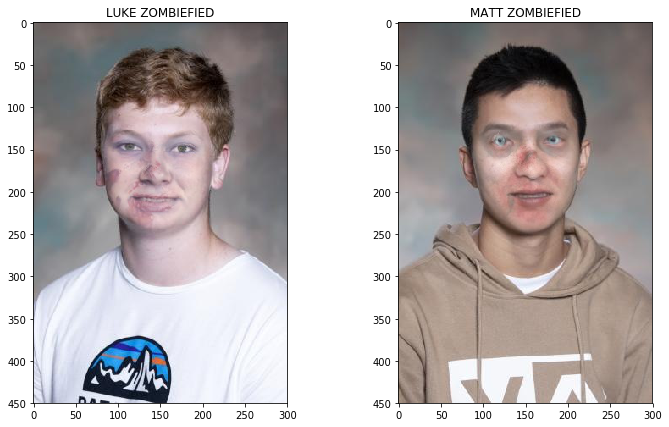

In [31]:
zombie = './imgResource/zombie.jpg'
zombie_2 = './imgResource/zombie_2.jpg'

mergeFace_res = api.mergeface(template_file=File(luke_bowsher), merge_file=File(zombie_2))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))

ax1.set_title('LUKE ZOMBIEFIED')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax1.imshow(img)

mergeFace_res = api.mergeface(template_file=File(matt_phua), merge_file=File(zombie))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

ax2.set_title('MATT ZOMBIEFIED')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax2.imshow(img)

plt.show()

## MATT PHUA GALORE [FAILS Because Don't Have Paid Version]

Merging Matt's face with everyone in the class...was fairly complex to plot it all at once here!

Title：MergeResultImg.jpg，Saved to: .imgResource/
Title：MergeResultImg.jpg，Saved to: .imgResource/


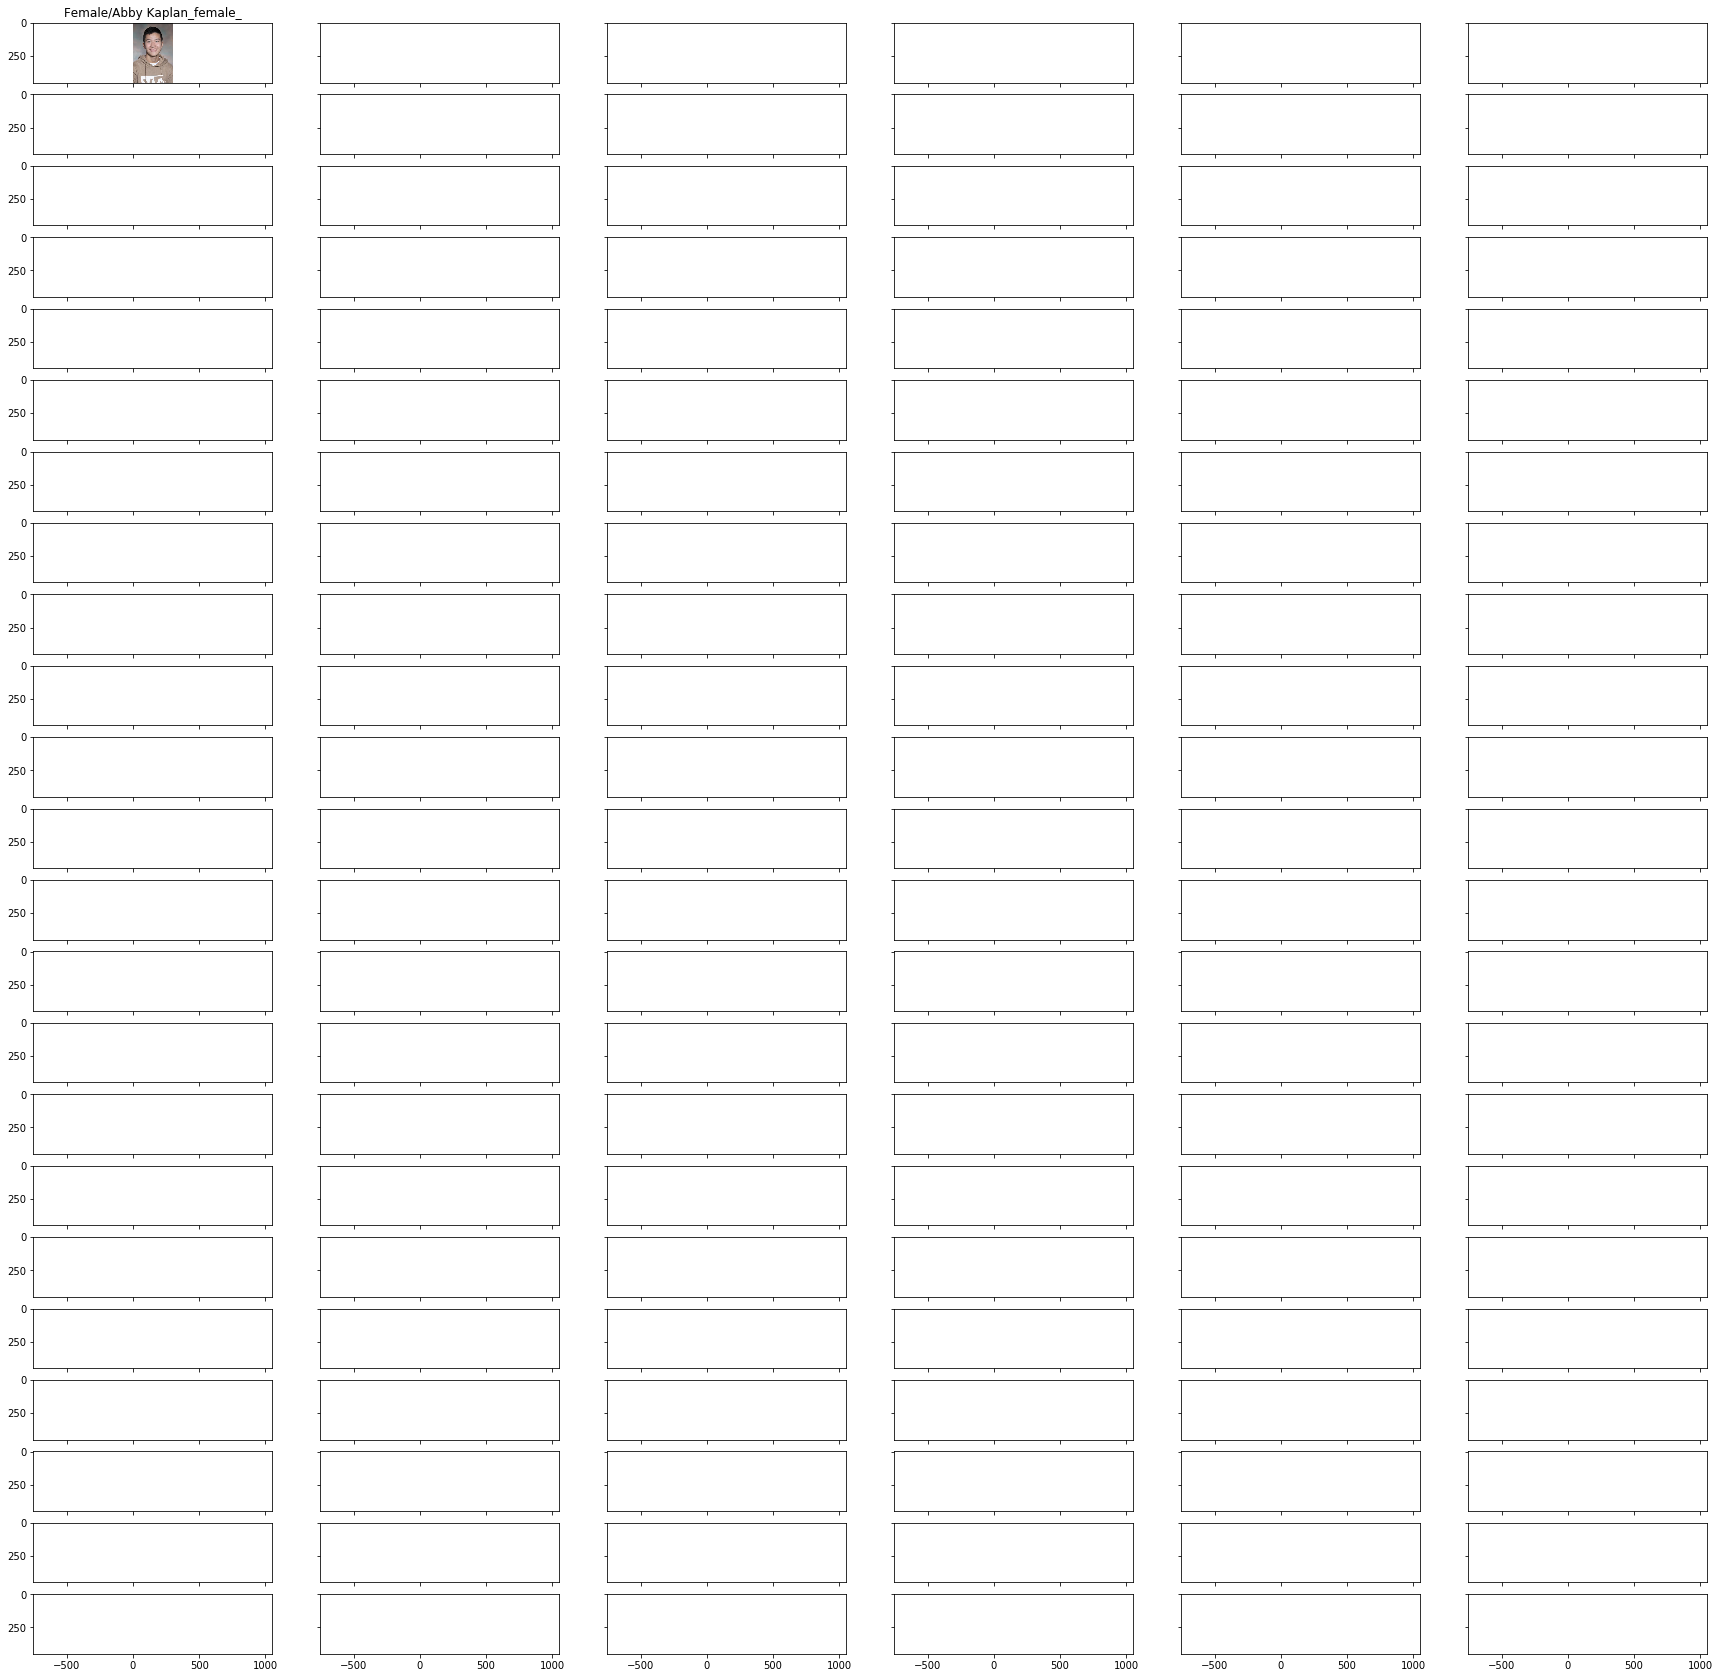

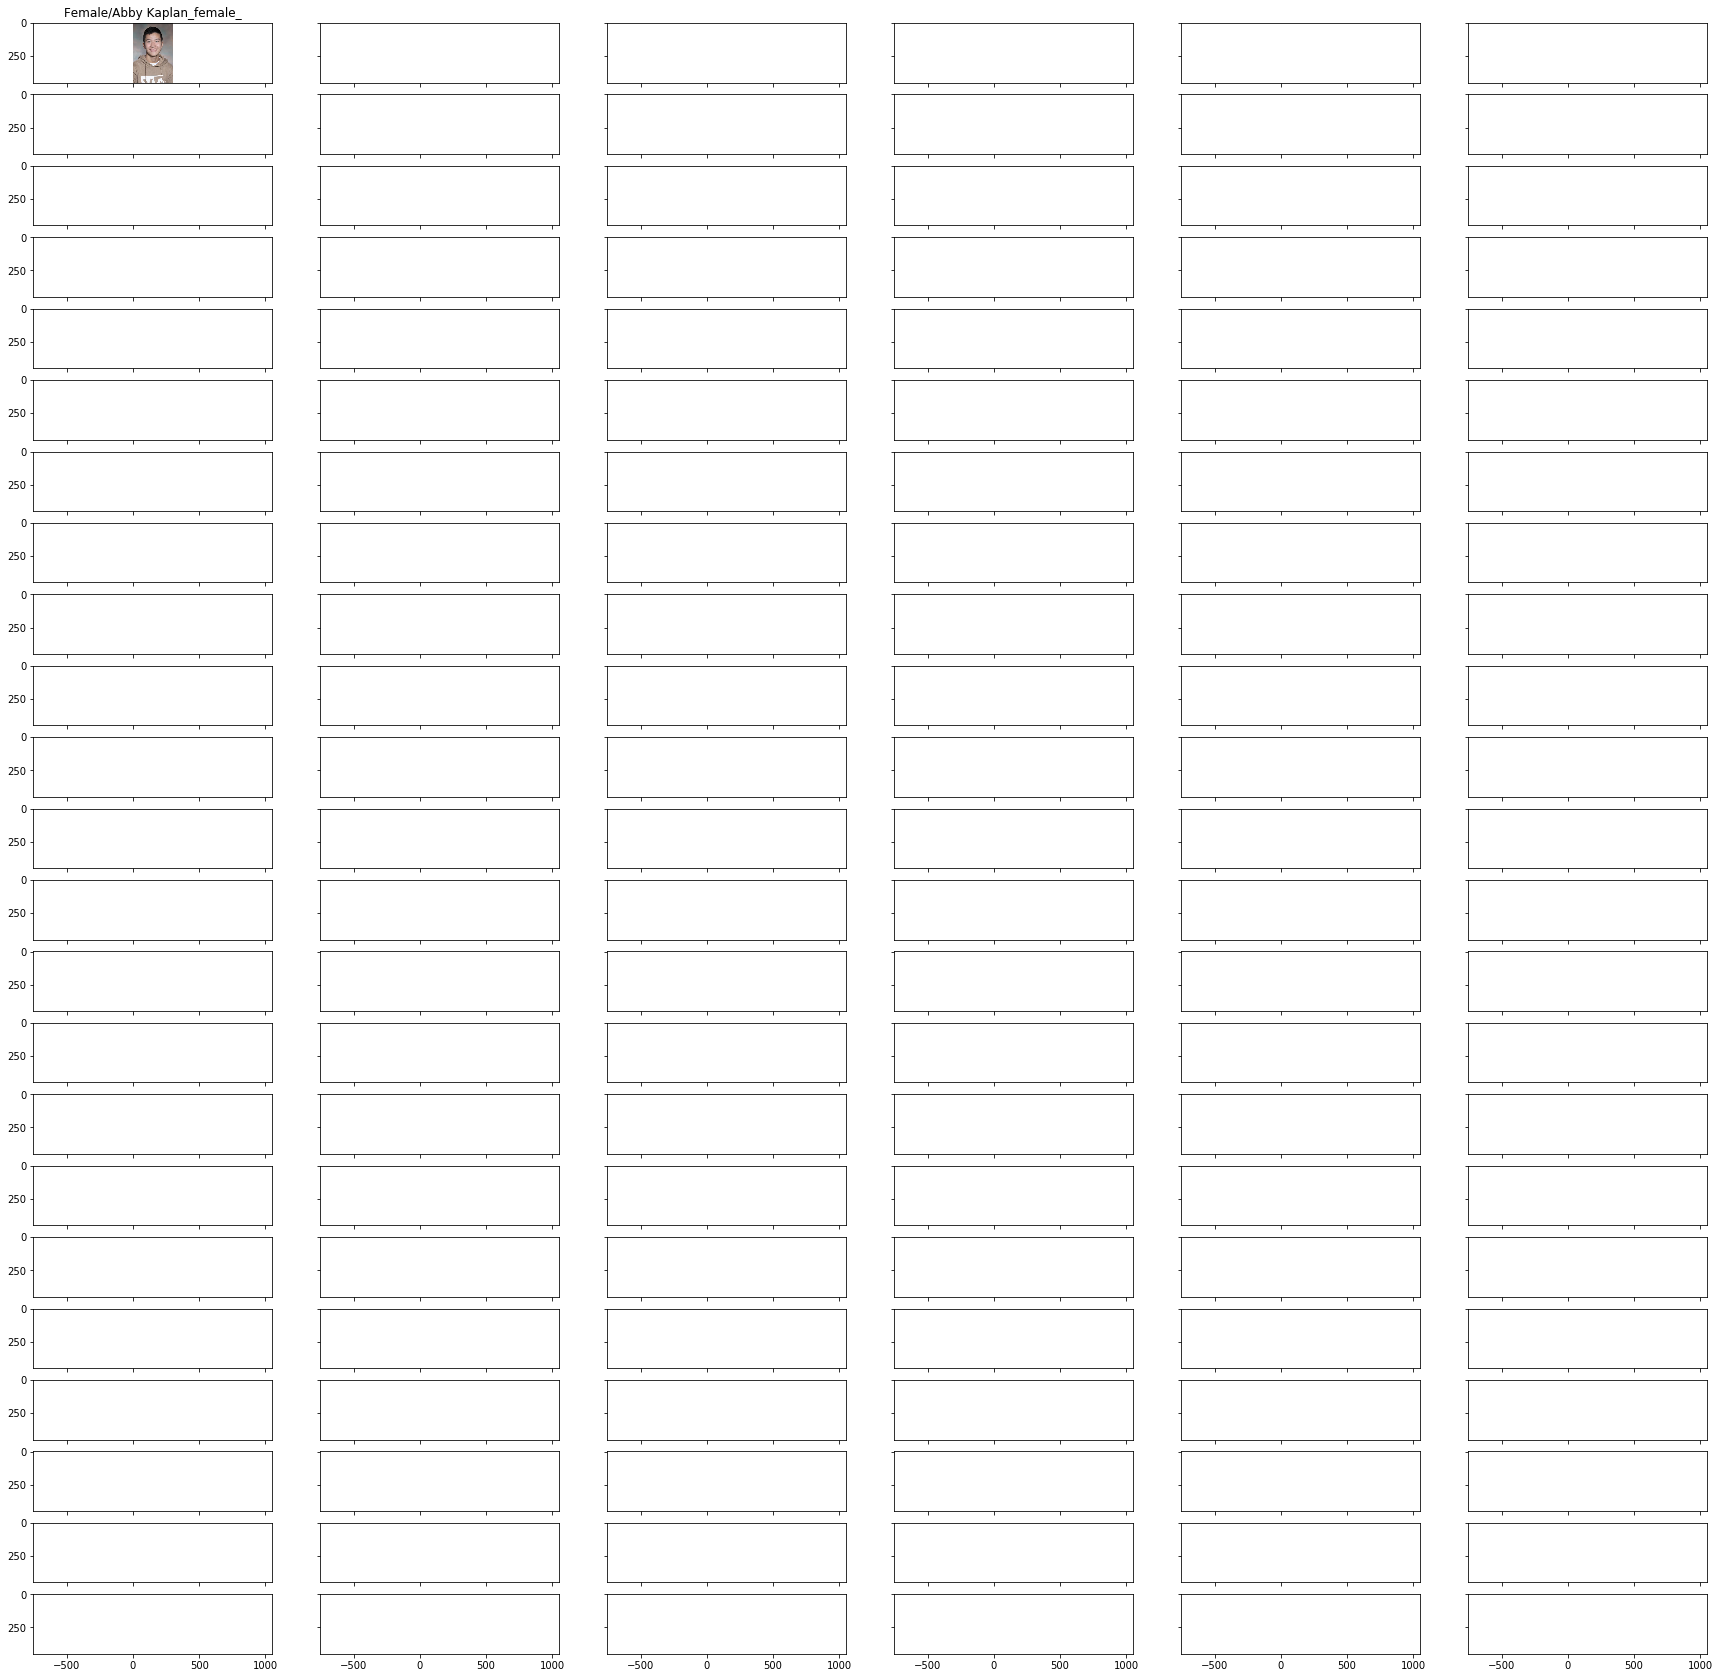

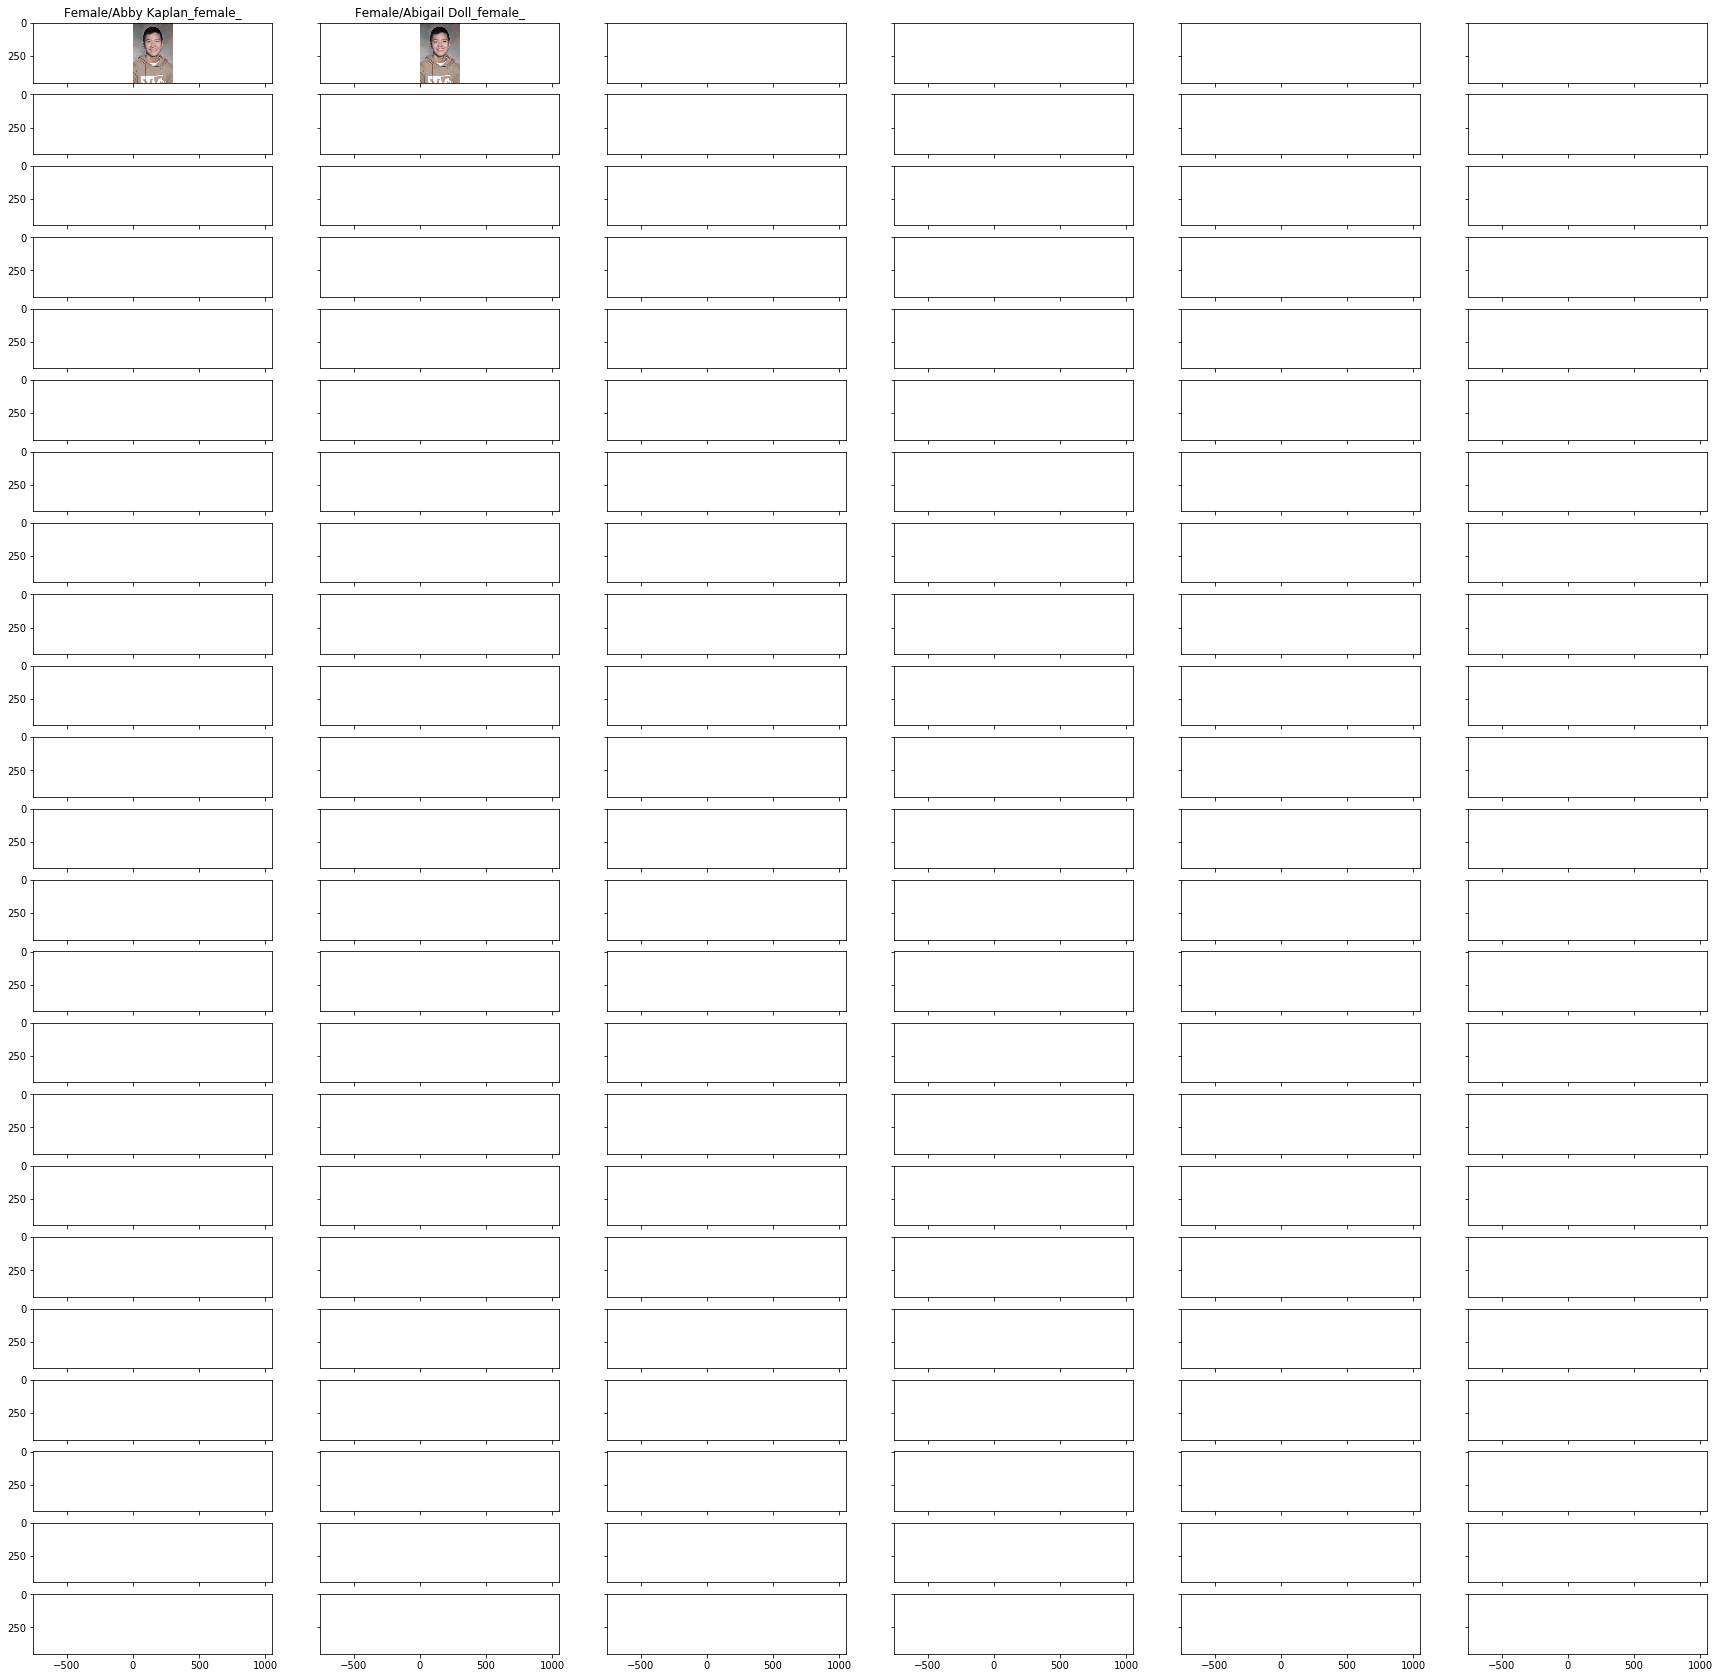

In [52]:
def matt_phuaed(image):
    mergeFace_res = api.mergeface(template_file=File(matt_phua), merge_file=File(image))
    PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

# There are 138 kids in the class, so I will make it 6X23
f,a = plt.subplots(23,6, sharex= True, sharey = True)
f.set_size_inches(30, 30) # Setting each one pretty small 

for i in range(2):
    title = good_title(grade_12_image_names[i:i+1])
    matt_phuaed(str(title))
        
    # Row and col to organize the graphs in the output
    row = int(i/6) 
    col = int(i%6)
    
    a[row][col].set_title(title.strip('./KnightbookScraping/Grade-12/'))
    img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
    imgplot = a[row][col].imshow(img)
    
plt.show()   

Unfortunately, due to concurrency limits on the free API version, I can not run Matt across every face :(((...However, if you were to buy the paid version, this code would work perfectly! Here is the screenshot of where in the documentation it discusses this problem: 

<img src="ConcurrencyLimitProblem.png">

If you would like the purchase the paid API version and re-run my code, it will work...if you are so inclined, please show me the ultimate result! 

# CONCLUSION: SNOOOOOOP

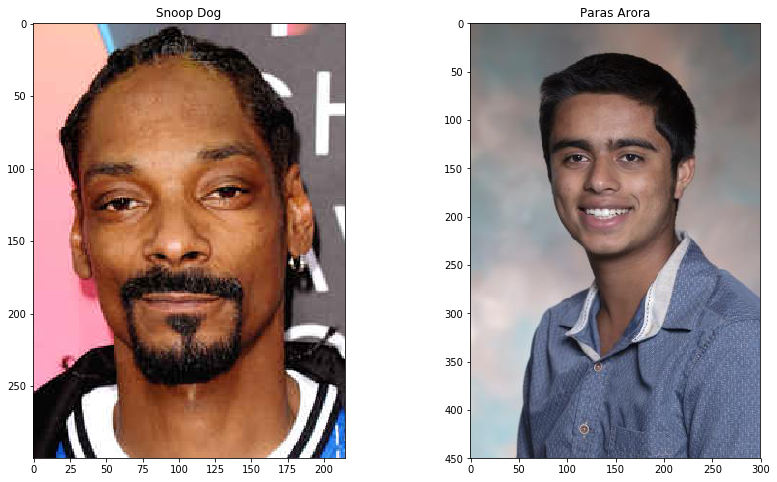

In [44]:
paras_arora = './KnightbookScraping/Grade-12/Male/Paras Arora_male_Grade-12.png'
snoop = './imgResource/Snoop.jpg'

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))

ax1.set_title('Snoop Dog')
img = mpimg.imread(snoop, 0)
imgplot = ax1.imshow(img)

ax2.set_title('Paras Arora')
img = mpimg.imread(paras_arora, 0)
imgplot2 = ax2.imshow(img)

plt.show()

Title：MergeResultImg.jpg，Saved to: .imgResource/


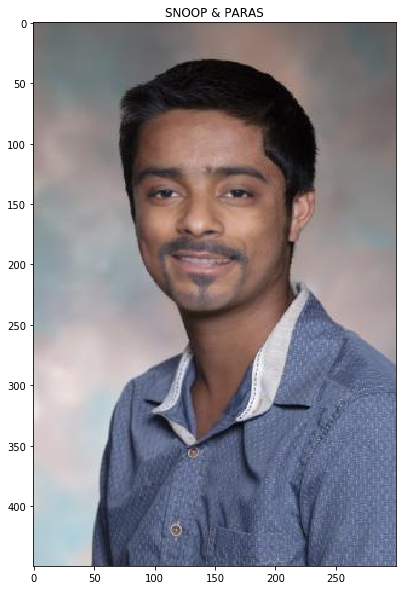

In [54]:
santa = './imgResource/santa.jpg'

f, (ax1) = plt.subplots(1, 1, figsize=(15,10))

mergeFace_res = api.mergeface(template_file=File(paras_arora), merge_file=File(snoop))
PythonSDK.ImagePro.ImageProCls.getMergeImg(mergeFace_res["result"]) # The fusion!

ax1.set_title('SNOOP & PARAS')
img = mpimg.imread('./imgResource/MergedImg.jpg', 0)
imgplot = ax1.imshow(img)

plt.show()

In [1]:
import IPython
IPython.display.Audio("./Dr Dre.mp3", autoplay=True)

# THANKS FOR READING